##Importing of packages

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
print ('cell successful')

cell successful


##Uploading Excel File for further analysis

In [31]:
df = pd.read_excel('https://query.data.world/s/d256dbwbljkqmlc5xzo5z2ribcuocu')
df
#df shows the first and last 5 observations of the dataset

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,ZWE,2013,0.155670,0.607993,0.117248,3.090168,0.766280,3.128192,1.515641
6464,Zimbabwe,ZWE,2014,0.155993,0.608610,0.118073,3.093964,0.768914,3.140290,1.515470
6465,Zimbabwe,ZWE,2015,0.156465,0.609363,0.119470,3.098687,0.771802,3.155710,1.514751
6466,Zimbabwe,ZWE,2016,0.157111,0.610234,0.121456,3.104294,0.772275,3.174134,1.513269


##Q1.Defining possible dependent and independent variables.

In [32]:
#Below we can see a list of all the columns currently in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     6468 non-null   object 
 1   Code                       5488 non-null   object 
 2   Year                       6468 non-null   int64  
 3   Schizophrenia (%)          6468 non-null   float64
 4   Bipolar disorder (%)       6468 non-null   float64
 5   Eating disorders (%)       6468 non-null   float64
 6   Anxiety disorders (%)      6468 non-null   float64
 7   Drug use disorders (%)     6468 non-null   float64
 8   Depression (%)             6468 non-null   float64
 9   Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 505.4+ KB


In this section, we can see a list of all the columns currently in the dataset.

Possible IVs: entity, year

Possible DVs: schizophrenia(%), bipolar(%), anxiety(%), drug use disorders(%), depression(%), alcohol use disorders(%)

The dependent variable and indepent variable change depending on what we are looking for in this dataset.

##Q2.Missing Data

In [33]:
#df.info() shows which columns has missing data under Non-Null Count
df.info('show_counts')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Entity                     6468 non-null   object 
 1   Code                       5488 non-null   object 
 2   Year                       6468 non-null   int64  
 3   Schizophrenia (%)          6468 non-null   float64
 4   Bipolar disorder (%)       6468 non-null   float64
 5   Eating disorders (%)       6468 non-null   float64
 6   Anxiety disorders (%)      6468 non-null   float64
 7   Drug use disorders (%)     6468 non-null   float64
 8   Depression (%)             6468 non-null   float64
 9   Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 505.4+ KB


In [34]:
#df[''].isnull().value_counts() returns the number of missing values from the selected column
#Below shows that there are 980 missing values from the 'Code' column
df['Code'].isnull().value_counts()

False    5488
True      980
Name: Code, dtype: int64

##Q3. Transformation 1 (creating rules to group up years by decades)

In [58]:
#Here, we are grouping the 'Year' by decades
#From 1990 to 1999, we will make it '1990s'
#From 2000 to 2009, we will make it '2000s'
#From 2010 and on, we will make it '2010s' 
def yearTransform(column):
  if column['Year'] >= 2010:
    return '2010s'
  elif column ['Year'] >=2000 <2010:
    return '2000s'
  else:
    return '1990s'

In [59]:
df['year_mod'] = df.apply(yearTransform, 1)

In [60]:
df[['Year', 'year_mod']].sample(25)

,Year,year_mod
2640,1998,1990s
322,2004,2000s
577,2007,2000s
4157,2003,2000s
4853,1999,1990s
5469,1999,1990s
4096,1998,1990s
4444,2010,2010s
2316,2010,2010s
2530,2000,2000s


##Q3.Transformation 2 (creting rules to distinguish anxiety prevalence)

In [61]:
#We will use similar approach for the prevalence of anxiety disorders
#For prevalence greater than and equal to 6, we will label it as 'High' prevalence
#For prevalence greater than and equal to 4 and less than 6, we will label it as 'Medium' prevalence
#Other than the above conditions, we will label it as 'Low' prevalence
def anxietyTransform(column):
  if column['Anxiety disorders (%)'] >= 6:
    return 'High'
  elif column ['Anxiety disorders (%)'] >=4 <6:
    return 'Medium'
  else:
    return 'Low'
 
print ('cell successful')

cell successful


In [62]:
df['anxiety_mod'] = df.apply(anxietyTransform, 1)

In [63]:
df[['Anxiety disorders (%)', 'anxiety_mod']].sample(25)

,Anxiety disorders (%),anxiety_mod
2447,4.479736,Medium
4342,3.733014,Low
1132,2.991246,Low
2664,3.314811,Low
2073,3.255655,Low
3619,2.916585,Low
3507,3.192989,Low
1383,2.869182,Low
6380,3.779191,Low
2578,2.802392,Low


##Q4. Central Tendency and Distribution of Responses of Depression Prevalence in the World

In [41]:
#Below shows the average prevalence of depression in the world
df['Depression (%)'].mean()

3.497653585653154

In [42]:
#Below shows the median of the depression prevalence in the world
df['Depression (%)'].median()

3.499605996015

In [43]:
#Below shows the mode (the value that appears most frequently in a dataset) of the depression prevalence in the world
df['Depression (%)'].mode()

0       2.139903
1       2.141201
2       2.143395
3       2.145263
4       2.150070
          ...   
6463    6.582469
6464    6.586734
6465    6.598258
6466    6.601250
6467    6.602754
Length: 6468, dtype: float64

<function matplotlib.pyplot.show>

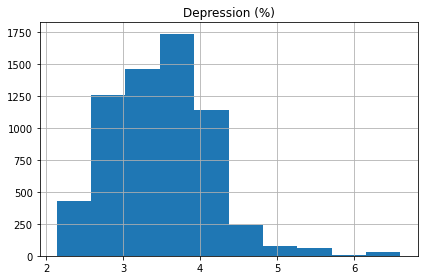

In [44]:
 #histogram of the data for distribution of response
df.hist('Depression (%)')
plt.tight_layout()
plt.show

##Q5.Value Counts

In [45]:
#Here we can see the counts of different countries/regions
df['Entity'].value_counts()

Eritrea                             28
Honduras                            28
Sri Lanka                           28
United States                       28
Saudi Arabia                        28
                                    ..
Vietnam                             28
United Kingdom                      28
Trinidad and Tobago                 28
Romania                             28
Saint Vincent and the Grenadines    28
Name: Entity, Length: 231, dtype: int64

##Q6.Quartile Ranges

In [46]:
#df.describe() shows the mean, median, mode, and quartile ranges at 25%, 50%, 75%
df['Schizophrenia (%)'].describe()

count    6468.000000
mean        0.211644
std         0.044253
min         0.146902
25%         0.181530
50%         0.199563
75%         0.236365
max         0.375110
Name: Schizophrenia (%), dtype: float64

##Q7.Visualization 1: Bar graph to show the average prevalence of Schizophrenia over the years 1990 - 2017 in the listed five countries.

In [47]:
df_test = pd.pivot_table(df, values='Schizophrenia (%)', index=['Entity'],
                    aggfunc=np.mean)
df_test = pd.DataFrame(df_test)
df_test = df_test.reset_index()
df_test

,Entity,Schizophrenia (%)
0,Afghanistan,0.162974
1,Albania,0.196544
2,Algeria,0.194960
3,American Samoa,0.249785
4,Andean Latin America,0.197425
...,...,...
226,Western Sub-Saharan Africa,0.171223
227,World,0.254047
228,Yemen,0.171712
229,Zambia,0.160916


In [48]:
#We are only taking a sample of 5 countries due to the fact that there are 231 regions listed
df2 = df_test.sample(5)

In [49]:
#In this bar graph, we can see that Switzerland has the highest average prevalence in Schizophrenina over the period of 1990 to 2017.
fig = px.bar(df2, x='Entity', y='Schizophrenia (%)', template="plotly_dark", color='Entity')
fig.show()


##Q7.Visualization 2: Line graph to show changes of prevalence of Depression in United States from years 1990 to 2017.

Text(0.5, 1.0, 'Depression (%) in United States')

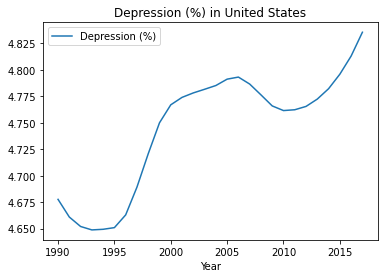

In [50]:
#Line gaph showing the changes of prevalence of Depression in United States from years 1990 to 2017
#Here, the dependent variable is Depression prelence and the independent variable is year.
df.iloc[6076:6104].plot(y='Depression (%)', x='Year')
plt.title(label='Depression (%) in United States', fontdict=None, loc='center', pad=None)

##Q7. Visualization 3: Bar graph to show average prevalence of Depression over the years 1990 - 2017 in different regions.

In [51]:
#Categorizing countries by continents.
Asia = ['Afghanistan', 'Armenia', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'South Sudan', 'Southeast Asia', 'Sri Lanka', 'Sudan', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']
Europe = ['Albania', 'Andorra', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Egypt', 'England', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Montenegro', 'Netherlands', 'New Zealand', 'Northern Ireland', 'Norway', 'Poland', 'Portugal','Romania', 'Russia', 'Scotland', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Wales']
Africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic',  'Chad', 'Comoros', 'Congo', 'Cote dIvorie', 'Democratic Republic of Congo', 'Djibouti', 'quatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 'Morocco', 'Namibia', 'Niger', 'Nigeria','Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe']
Oceania = ['American Samoa', 'Australia', 'Australasia', 'Fiji', 'Guam', 'Kiribati', 'Marshall Islands', 'Northern Mariana Islands', 'Oceania', 'Papua New Guinea', 'Samoa', 'Solomon Islands','Tonga', 'Vanuatu']
America = ['Andean Latin America', 'Antigua and Barbuda', 'Argentina', 'Bahamas', 'Barbados', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Canada', 'Caribbean', 'Chile', 'Columbia', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Greeland', 'Grenada', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Latin America and Caribbean', 'Mexico', 'Nicaragua', 'North America', 'Panama', 'Paraguay', 'Peru', 'Puerto Rico', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname', 'Trinidad and Tobago', 'United States', 'United States Virgin Islands', 'Uruguay', 'Venezuela']


In [52]:
def region_mod(row):
  if row['Entity'] in Asia:
    return 'Asia'
  elif row['Entity'] in Europe:
    return 'Europe'
  elif row['Entity'] in Africa:
    return 'Africa'
  elif row['Entity'] in Oceania:
    return 'Oceania'
  elif row['Entity'] in America:
    return 'America'
  else: 
    return 'Other Regions'
print ('cell successful')

cell successful


In [53]:
df['Continents'] = df.apply(region_mod, 1)
df['Continents']

0         Asia
1         Asia
2         Asia
3         Asia
4         Asia
         ...  
6463    Africa
6464    Africa
6465    Africa
6466    Africa
6467    Africa
Name: Continents, Length: 6468, dtype: object

In [54]:
df[['Entity', 'Continents']].sample(25)

,Entity,Continents
3293,Lithuania,Europe
1802,Egypt,Europe
2586,Honduras,America
4014,New Zealand,Europe
5938,Turkmenistan,Asia
2448,Haiti,America
1695,East Asia,Other Regions
6142,Uruguay,America
3992,Netherlands,Europe
1775,Ecuador,America


In [55]:
df3 = pd.pivot_table(df, values='Depression (%)', index=['Continents'],
                    aggfunc=np.mean)
df3 = pd.DataFrame(df3)
df3 = df3.reset_index()
df3

,Continents,Depression (%)
0,Africa,3.791007
1,America,3.139446
2,Asia,3.379006
3,Europe,3.577152
4,Oceania,3.365074
5,Other Regions,3.620489


In [57]:
#Bar graph showing the average prevalence of depression across the listed regions
(df3, x='Continents', y='Depression (%)', template="plotly_dark", color='Continents',title='Depression(%) in the World')
fig.show()

##Part 3


1. The purpose of this dataset is to inform the readers of the prevalence of 7 different mental health issues in 231 countries from years 1990 to 2017. 
2. There are 6468 rows and 10 columns for this dataset.
3. The problem I found within this dataset is that it has 980 missing values in the 'Code' column.
4. The variable 'Depression (%)' was not normally distributed. The variable was right-skewed distribution, which means it was positively distributed.   
